In [1]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

# import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

import nltk as nl
# from nltk.tokenize import word_tokenize,wordpunct_tokenize
# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.corpus import words
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from scipy.signal import correlate

# Load and verify data

In [2]:
Evangiles = pickle.load(open("data/Evangiles.pkl", "rb"))
Mark = pickle.load(open("data/Mark.pkl", "rb"))
Matt = pickle.load(open("data/Matt.pkl", "rb"))
Luke = pickle.load(open("data/Luke.pkl", "rb"))
John = pickle.load(open("data/John.pkl", "rb"))

# Ev_verses = Evangiles.shape[0]
display(Evangiles.sample(5))

DM_Ev = pickle.load(open("distance_matrices/dist_mat_Ev.pkl", "rb"))
DM_Mc = pickle.load(open("distance_matrices/dist_mat_Mc.pkl", "rb"))
DM_Mt = pickle.load(open("distance_matrices/dist_mat_Mt.pkl", "rb"))
DM_Lc = pickle.load(open("distance_matrices/dist_mat_Lc.pkl", "rb"))
DM_Jn = pickle.load(open("distance_matrices/dist_mat_Jn.pkl", "rb"))

/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
1096,Mark 1:29,καὶ εὐθὺς ἐκ τῆς συναγωγῆς ἐξελθόντες ἦλθον εἰ...,"[καὶ, εὐθὺς, ἐκ, τῆς, συναγωγῆς, ἐξελθόντες, ἦ...","[καί, εὐθύς, ἐκ, ὁ, συναγωγή, ἐξέρχομαι, ἔρχομ...","[εὐθὺς, συναγωγῆς, ἐξελθόντες, ἦλθον, οἰκίαν, ...","[συναγωγή, ἐξέρχομαι, ἔρχομαι, οἰκία, σίμων, ἀ...","[(συναγωγή, ἐξέρχομαι), (ἐξέρχομαι, ἔρχομαι), ...","[(συναγωγή, ἐξέρχομαι, ἔρχομαι), (ἐξέρχομαι, ἔ...","[0.2132693591693105, 0.28133742642393345, 0.34...","[coordinating_conjunction, adverb, adposition,...","[[], [], [], [(nominative, accusative, ergativ...","[ιὤαννης, οἰκία, σίμων, συναγωγή, ἀνδρέης, ἐξέ..."
3005,John 4:4,ἔδει δὲ αὐτὸν διέρχεσθαι διὰ τῆς σαμαρείας,"[ἔδει, δὲ, αὐτὸν, διέρχεσθαι, διὰ, τῆς, σαμαρε...","[δεῖ, δέ, αὐτός, διέρχομαι, διά, ὁ, σαμαρεία]","[ἔδει, αὐτὸν, διέρχεσθαι, σαμαρείας]","[δεῖ, διέρχομαι, σαμάρεια]","[(δεῖ, διέρχομαι), (διέρχομαι, σαμάρεια)]","[(δεῖ, διέρχομαι, σαμάρεια)]","[0.5659239839300861, 0.4835149776483967, 0.667...","[verb, adverb, pronoun, verb, adposition, dete...","[[(habitual, imperfective, iterative, perfecti...","[δεῖ, διέρχομαι, σαμάρεια]"
2472,Luke 16:5,καὶ προσκαλεσάμενος ἕνα ἕκαστον τῶν χρεοφειλετ...,"[καὶ, προσκαλεσάμενος, ἕνα, ἕκαστον, τῶν, χρεο...","[καί, προσκαλέω, εἷς, ἕκαστος, ὁ, χρεοφειλέτης...","[προσκαλεσάμενος, ἕνα, ἕκαστον, χρεοφειλετῶν, ...","[προσκαλέω, ἕκαστος, χρεοφειλετῶν, κύριος, λέγ...","[(προσκαλέω, ἕκαστος), (ἕκαστος, χρεοφειλετῶν)...","[(προσκαλέω, ἕκαστος, χρεοφειλετῶν), (ἕκαστος,...","[0.12922229881942446, 0.40066809936935566, 0.1...","[coordinating_conjunction, verb, numeral, adje...","[[], [(habitual, imperfective, iterative, perf...","[κύριος, λέγω, προσκαλέω, πρότερος, πόσος, χρε..."
1976,Luke 5:22,ἐπιγνοὺς δὲ ὁ ἰησοῦς τοὺς διαλογισμοὺς αὐτῶν ἀ...,"[ἐπιγνοὺς, δὲ, ὁ, ἰησοῦς, τοὺς, διαλογισμοὺς, ...","[ἐπιγιγνώσκω, δέ, ὁ, ἰησοῦς, ὁ, διαλογισμός, α...","[ἐπιγνοὺς, ἰησοῦς, διαλογισμοὺς, αὐτῶν, ἀποκρι...","[ἐπιγνοὺς, ἰησοῦς, διαλογισμοὺς, ἀποκριθεὶς, ...","[(ἐπιγνοὺς, ἰησοῦς), (ἰησοῦς, διαλογισμοὺς),...","[(ἐπιγνοὺς, ἰησοῦς, διαλογισμοὺς), (ἰησοῦς, ...","[0.1925015860958928, 0.17601752811808272, 0.31...","[verb, adverb, determiner, noun, determiner, n...","[[(nominative, accusative, ergative, absolutiv...","[διαλογίζομαι, διαλογισμοὺς, εἶπον, καρδία, ἀπ..."
3219,John 7:47,ἀπεκρίθησαν οὖν αὐτοῖς οἱ φαρισαῖοι μὴ καὶ ὑμε...,"[ἀπεκρίθησαν, οὖν, αὐτοῖς, οἱ, φαρισαῖοι, μὴ, ...","[ἀποκρίνω, οὖν, αὐτός, ὁ, φαρισαῖος, μή, καί, ...","[ἀπεκρίθησαν, αὐτοῖς, φαρισαῖοι, ὑμεῖς, πεπλάν...","[ἀποκρίνω, φαρισαῖος, πλανάω]","[(ἀποκρίνω, φαρισαῖος), (φαρισαῖος, πλανάω)]","[(ἀποκρίνω, φαρισαῖος, πλανάω)]","[0.5229564161546975, 0.483832032899994, 0.7017...","[verb, adverb, pronoun, determiner, noun, adve...","[[(habitual, imperfective, iterative, perfecti...","[πλανάω, φαρισαῖος, ἀποκρίνω]"


# Additionnal features

In [3]:
def add_features(df):
    df['length'] = [len(txt) for txt in df.text]
    return df
    
Evangiles = add_features(Evangiles)
Matt = add_features(Matt)
Mark = add_features(Mark)
Luke = add_features(Luke)
John = add_features(John)

# Edit distance test on 2 verses

In [5]:
# Edit distance test on verses
id_verse_1 = "Mark 8:31"
# id_verse_1 = "Matt 16:21"
id_verse_2 = "Luke 9:22"
# id_verse_2 = "Luke 1:2"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verses == id_verse].reset_index(drop=True)
    display(extracted_verse)
    return extracted_verse

# Find the verses in dataframes
v_1 = extract_verse(id_verse_1,Evangiles)
v_2 = extract_verse(id_verse_2,Evangiles)

def compute_distance(v_1,v_2,method,info=False,transpos=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    # Compute edit distance (characters)
    if min(len_v1,len_v2) != 0 : edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos)-abs(len_v1-len_v2))/min(len_v1,len_v2)*max(len_v1,len_v2)  # Normalized distance
    else : edit_dist = 1
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Raw distance (unity : words/characters)

    if info == True:
        print("\n-----",method," -----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)
    return edit_dist

compute_distance(v_1,v_2,'text',True)
compute_distance(v_1,v_2,'tokens',True,True)
compute_distance(v_1,v_2,'lemmata',True,True)
compute_distance(v_1,v_2,'tokens_filtered',True,True)
compute_distance(v_1,v_2,'lemmata_filtered',True,True)
compute_distance(v_1,v_2,'pos',True,True)
compute_distance(v_1,v_2,'vocabulary',True,True)

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary,length
0,Mark 8:31,καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τ...,"[καὶ, ἤρξατο, διδάσκειν, αὐτοὺς, ὅτι, δεῖ, τὸν...","[καί, ἄρχω, διδάσκω, αὐτός, ὅτι, δεῖ, ὁ, υἱός,...","[ἤρξατο, διδάσκειν, αὐτοὺς, δεῖ, υἱὸν, ἀνθρώπο...","[ἄρχω, διδάσκω, δεῖ, υἱός, ἄνθρωπος, πολύς, πά...","[(ἄρχω, διδάσκω), (διδάσκω, δεῖ), (δεῖ, υἱός),...","[(ἄρχω, διδάσκω, δεῖ), (διδάσκω, δεῖ, υἱός), (...","[0.18815532802979715, 0.1990864219816093, 0.24...","[coordinating_conjunction, verb, verb, pronoun...","[[], [(habitual, imperfective, iterative, perf...","[γραμματεύς, δεῖ, διδάσκω, πάσχω, πολύς, πρέσβ...",196


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary,length
0,Luke 9:22,εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθε...,"[εἰπὼν, ὅτι, δεῖ, τὸν, υἱὸν, τοῦ, ἀνθρώπου, πο...","[λέγω, ὅτι, δεῖ, ὁ, υἱός, ὁ, ἄνθρωπος, πολύς, ...","[εἰπὼν, δεῖ, υἱὸν, ἀνθρώπου, πολλὰ, παθεῖν, ἀπ...","[εἶπον, δεῖ, υἱός, ἄνθρωπος, πολύς, πάσχω, ἀπο...","[(εἶπον, δεῖ), (δεῖ, υἱός), (υἱός, ἄνθρωπος), ...","[(εἶπον, δεῖ, υἱός), (δεῖ, υἱός, ἄνθρωπος), (υ...","[0.19900903047366258, 0.21057068239256096, 0.2...","[verb, subordinating_conjunction, verb, determ...","[[(habitual, imperfective, iterative, perfecti...","[γραμματεύς, δεῖ, εἶπον, πάσχω, πολύς, πρέσβυς...",166



----- text  -----

καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ὑπὸ τῶν πρεσβυτέρων καὶ τῶν ἀρχιερέων καὶ τῶν γραμματέων καὶ ἀποκτανθῆναι καὶ μετὰ τρεῖς ἡμέρας ἀναστῆναι
εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ἀπὸ τῶν πρεσβυτέρων καὶ ἀρχιερέων καὶ γραμματέων καὶ ἀποκτανθῆναι καὶ τῆι τρίτηι ἡμέραι ἐγερθῆναι
Edit distance between 2 verses : 22.433734939759034

----- tokens  -----

['καὶ', 'ἤρξατο', 'διδάσκειν', 'αὐτοὺς', 'ὅτι', 'δεῖ', 'τὸν', 'υἱὸν', 'τοῦ', 'ἀνθρώπου', 'πολλὰ', 'παθεῖν', 'καὶ', 'ἀποδοκιμασθῆναι', 'ὑπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'τῶν', 'ἀρχιερέων', 'καὶ', 'τῶν', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'μετὰ', 'τρεῖς', 'ἡμέρας', 'ἀναστῆναι']
['εἰπὼν', 'ὅτι', 'δεῖ', 'τὸν', 'υἱὸν', 'τοῦ', 'ἀνθρώπου', 'πολλὰ', 'παθεῖν', 'καὶ', 'ἀποδοκιμασθῆναι', 'ἀπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'ἀρχιερέων', 'καὶ', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'τῆι', 'τρίτηι', 'ἡμέραι', 'ἐγερθῆναι']
Edit distan

3.214285714285714

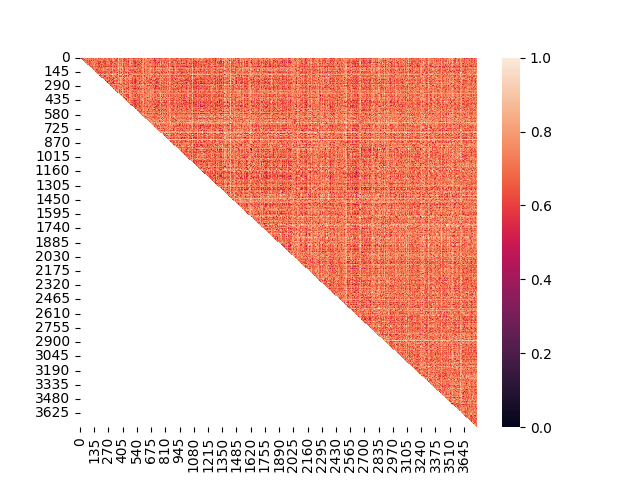

In [6]:
%matplotlib widget
plt.figure()
ax = sns.heatmap(DM_Ev[5], linewidth=0)
plt.show()

In [8]:
print(DM_Ev[5][10,10])

nan


# Distance matrix distributions

100%|█████████████████████████████████████████████| 7/7 [00:37<00:00,  5.42s/it]


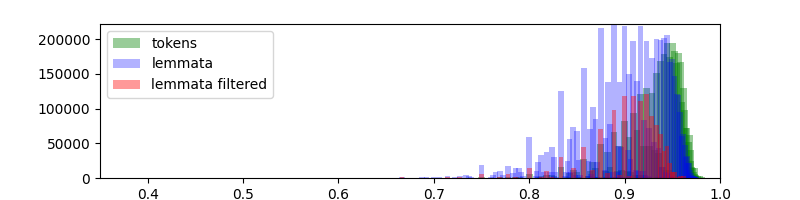

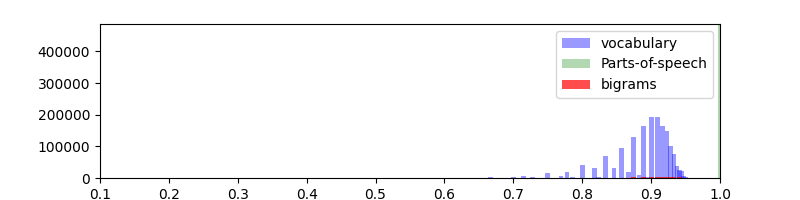

In [20]:
# dist_values = np.unique(DM_Mc[0])
# print(dist_values)
# print(np.where(DM_Mc[0]==dist_values[-2]))

def matricesValues(M):
    dist_values = np.unique(M)
    distri_M = []
    for val in dist_values[:-1]:
        coords = np.where(M==val)
        distri_M.append(len(coords[0]))
    return dist_values[:-1],distri_M

def distribution(DM):
    distri = []
    for M in tqdm(DM):
        distri.append(matricesValues(M))    
    plt.figure(figsize=(8,2))
    plt.bar(distri[0][0],distri[0][1],width=0.007,alpha=0.4,label='tokens',color='g')
    plt.bar(distri[1][0],distri[1][1],width=0.006,alpha=0.3,label='lemmata',color='b')
    plt.bar(distri[2][0],distri[2][1],width=0.005,alpha=0.4,label='lemmata filtered',color='r')
    plt.legend()
    plt.ylim([0,max(distri[1][1][:-1])])
    plt.xlim([0.35,1])
    plt.show()

    plt.figure(figsize=(8,2))
    plt.bar(distri[4][0],distri[4][1],width=0.007,alpha=0.4,label='vocabulary',color='b')
    plt.bar(distri[6][0],distri[6][1],width=0.007,alpha=0.3,label='Parts-of-speech',color='g')
    plt.bar(distri[3][0],distri[3][1],width=0.007,alpha=0.7,label='bigrams',color='r')
    plt.legend()
    plt.ylim([0,max(distri[5][1][:-1])])
    plt.xlim([0.1,1])
    plt.show()

    return distri

distri = distribution(DM_Ev)

In [9]:
# plt.figure(figsize=(8,2))
# plt.bar(distri_Mc[0][0],distri_Mc[0][1],width=0.005,alpha=0.4,label='tokens',color='g')
# plt.bar(distri_Mc[1][0],distri_Mc[1][1],width=0.004,alpha=0.3,label='lemmata',color='b')
# plt.bar(distri_Mc[2][0],distri_Mc[2][1],width=0.003,alpha=0.4,label='lemmata filtered',color='r')
# plt.legend()
# plt.legend()
# plt.ylim([0,max(distri_Mc[1][1][:-1])])
# plt.xlim([0.65,1])
# plt.show()

In [10]:
# plt.figure(figsize=(8,2))
# plt.bar(distri_Mc[4][0],distri_Mc[4][1],width=0.005,alpha=0.4,label='vocabulary',color='b')
# plt.bar(distri_Mc[5][0],distri_Mc[5][1],width=0.005,alpha=0.3,label='Parts-of-speech',color='g')
# plt.bar(distri_Mc[3][0],distri_Mc[3][1],width=0.005,alpha=0.7,label='bigrams',color='r')
# plt.legend()
# plt.ylim([0,max(distri_Mc[5][1][:-1])])
# plt.xlim([0.35,1])
# plt.show()

# Other distributions

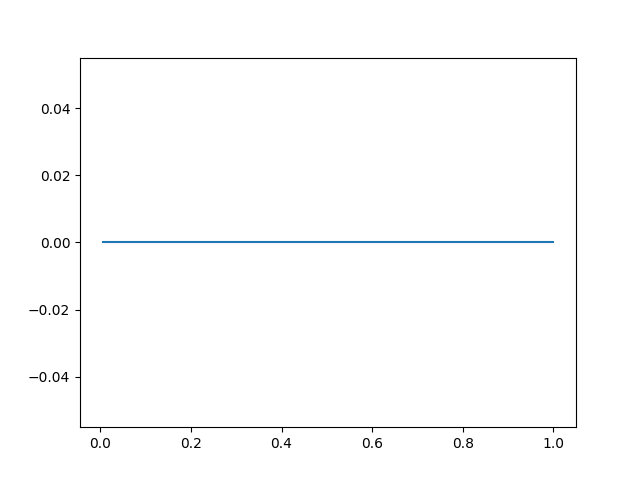

TypeError: _mean() got an unexpected keyword argument 'omitnan'

In [19]:
def distribution(M,step):
    M = M+M.transpose()-1
    cases = np.linspace(0,1,step)
    distrib = [0 for i in range(len(cases)-1)]
    for i in range(len(cases)-1):
        values_x,values_y = np.where((M<cases[i+1]) & (M>cases[i]))
        distrib[i] = len(values_x)
    return cases,distrib

cases,dist = distribution(DM_Mc[0],200)
plt.figure()
plt.plot(cases[1:],dist)
plt.show()
print(DM_Mc[0].mean(omitnan=True))

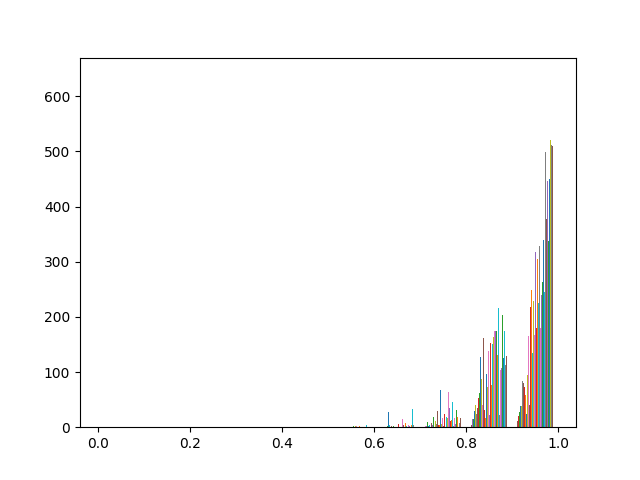

In [18]:
# Compute distributions for each distance matrices
%matplotlib widget
plt.figure()
# distrib = np.histogram(DM_Lc[5])


plt.hist(DM_Mc[0])
plt.show()

# Verses dendrogram computation

In [6]:
# Half matrix value correction
def triangularMatrix(M):
    length = M[0].shape
    for g in tqdm(range(6)):
        for i in range(length[0]):
            for j in range(0,i+1):
                M[g][i][j] = 1
    return M

DM_Mc = triangularMatrix(DM_Mc)
DM_Mt = triangularMatrix(DM_Mt)
DM_Lc = triangularMatrix(DM_Lc)
DM_Jn = triangularMatrix(DM_Jn)
DM_Ev = triangularMatrix(DM_Ev)

100%|█████████████████████████████████████████████| 6/6 [00:04<00:00,  1.47it/s]


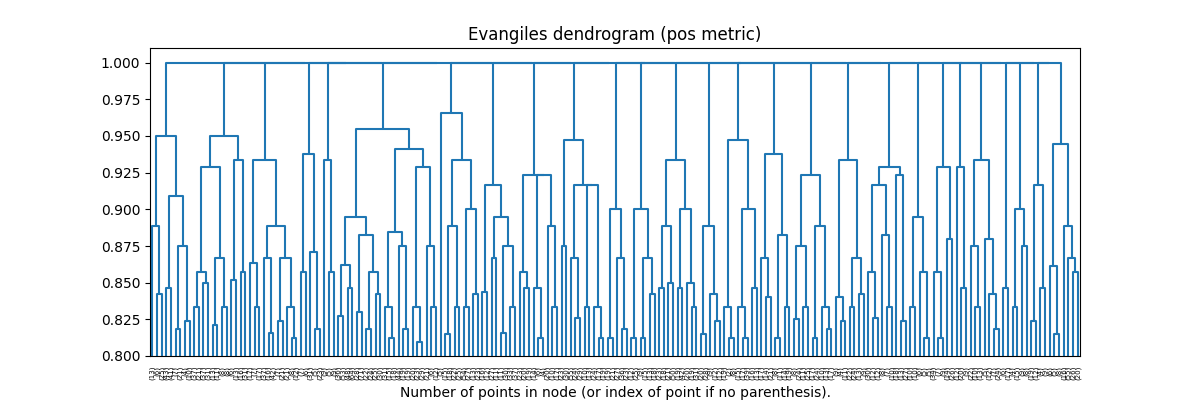

In [66]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model_dendro = AgglomerativeClustering(distance_threshold=0, n_clusters=None,metric='precomputed',linkage='complete') # Complete gives significantly better results (relatively homogenous clusters in sizes)
model_dendro = model_dendro.fit(DM_Ev[5]) 

plt.close()
plt.figure(figsize=(12, 4))
plt.title("Evangiles dendrogram (pos metric)")
# plot the top three levels of the dendrogram
plot_dendrogram(model_dendro, truncate_mode="lastp", p=200)
# plot_dendrogram(model_dendro, truncate_mode="level", p=2)
plt.ylim([0.8, 1.01])
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Hierarchical clustering

The dendrogram shows fully inconsistent clusters (distances equal to 1). We gather observations according to this pattern.

Number of clusters : 27


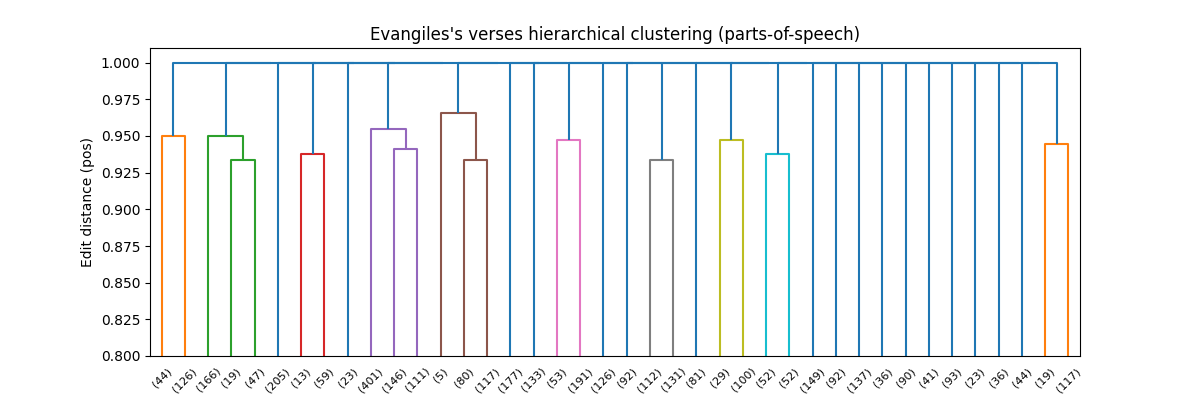

Number of clusters : 12


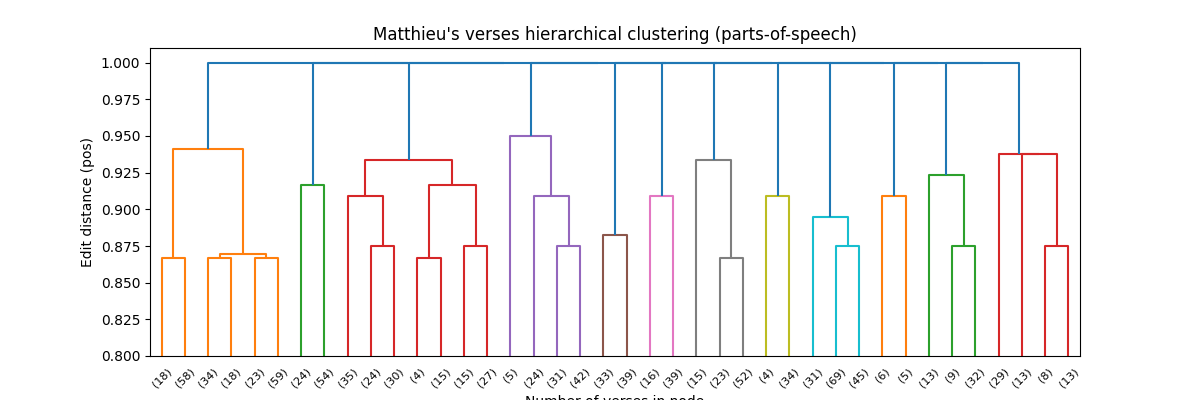

Number of clusters : 8


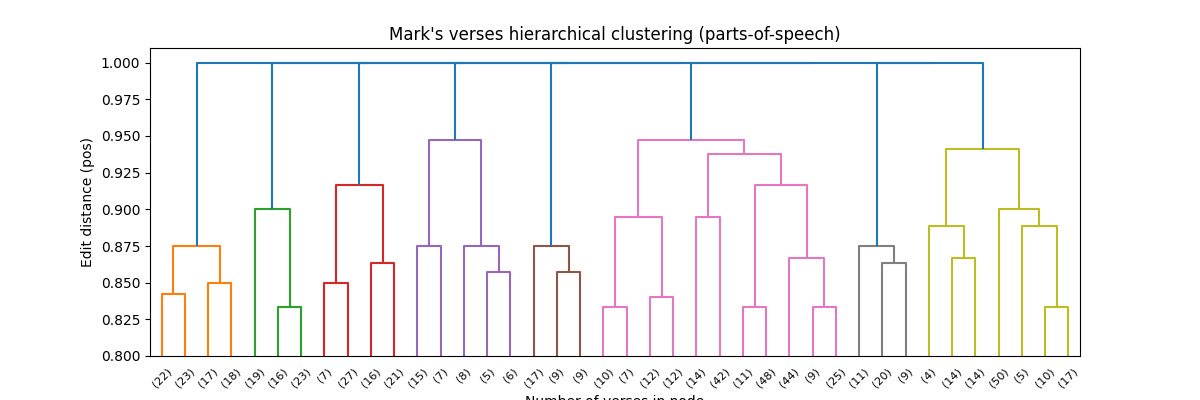

Number of clusters : 12


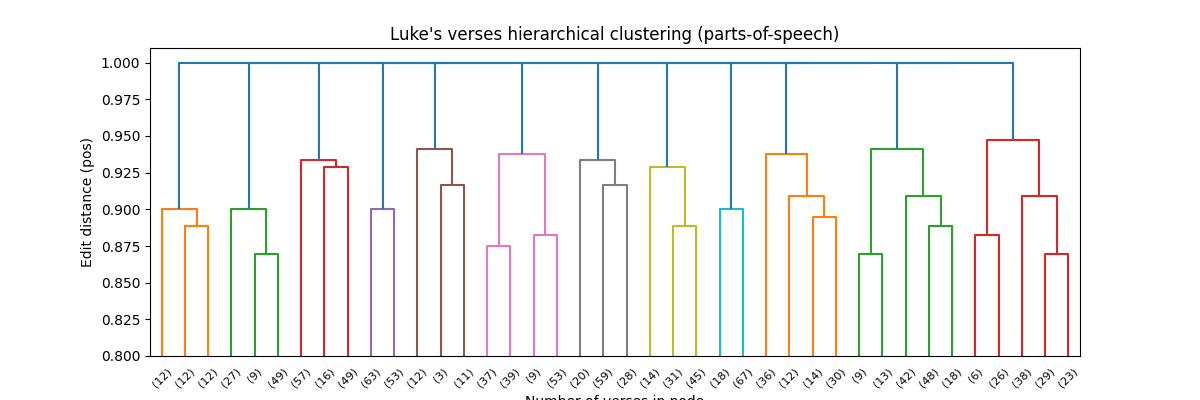

Number of clusters : 11


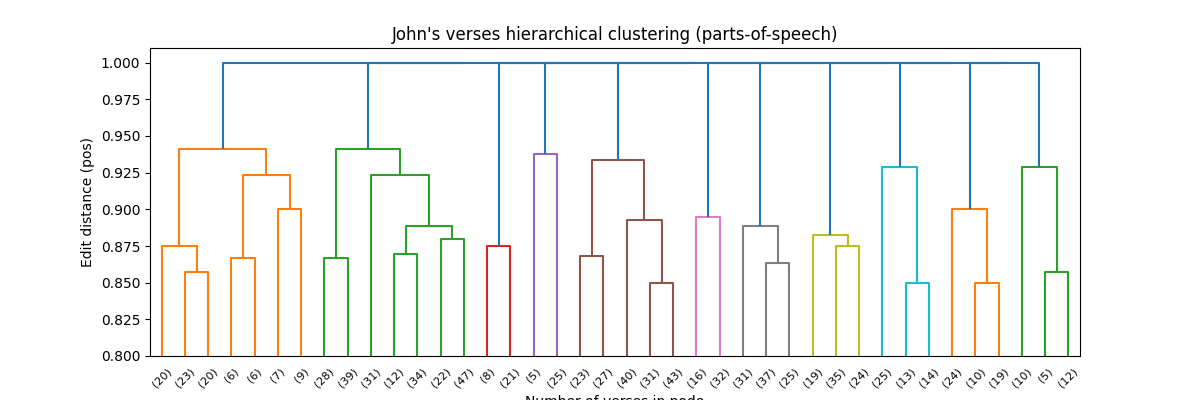

In [21]:
distance_thr = 0.98

model_clustering = AgglomerativeClustering(distance_threshold=distance_thr, n_clusters=None,metric='precomputed',linkage='complete') # Complete gives significantly better results (relatively homogenous clusters in sizes)

Evangiles['pos_clusters'] = model_clustering.fit_predict(DM_Ev[5])
Ev_clusters = len(np.unique(Evangiles['pos_clusters']))
print("Number of clusters :",str(Ev_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*10,color_threshold=distance_thr)
plt.title("Evangiles's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

Matt['pos_clusters'] = model_clustering.fit_predict(DM_Mt[5])
Mt_clusters = len(np.unique(Matt['pos_clusters']))
print("Number of clusters :",str(Mt_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("Matthieu's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

Mark['pos_clusters'] = model_clustering.fit_predict(DM_Mc[5])
Mc_clusters = len(np.unique(Mark['pos_clusters']))
print("Number of clusters :",str(Mc_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("Mark's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

Luke['pos_clusters'] = model_clustering.fit_predict(DM_Lc[5])
Lc_clusters = len(np.unique(Luke['pos_clusters']))
print("Number of clusters :",str(Lc_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("Luke's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

John['pos_clusters'] = model_clustering.fit_predict(DM_Jn[5])
Jn_clusters = len(np.unique(John['pos_clusters']))
print("Number of clusters :",str(Jn_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("John's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

# Clusters content investigation

## Verses lengths and positions

/tmp/ipykernel_34474/3707703199.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 4))


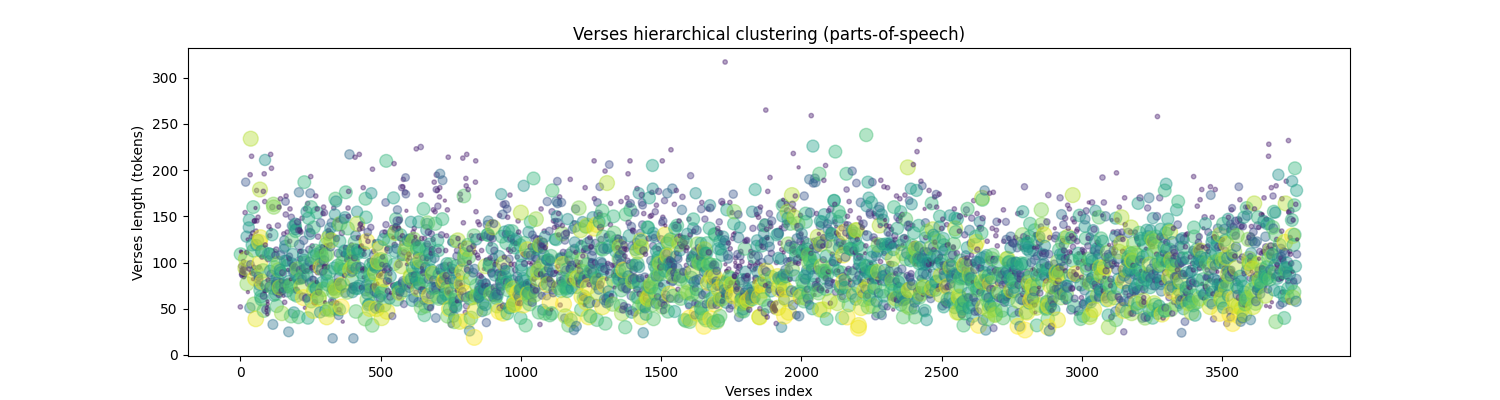

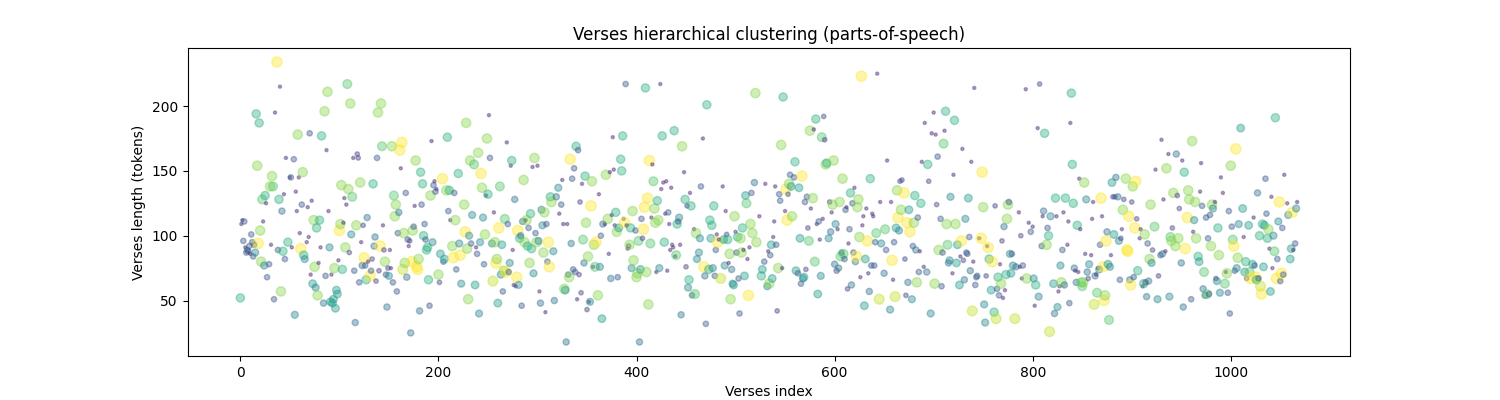

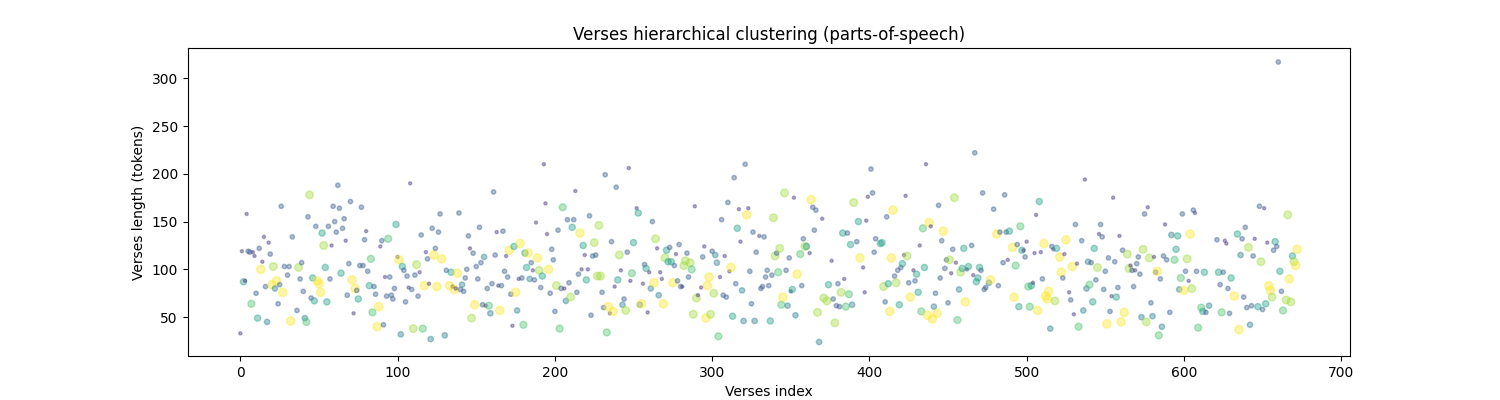

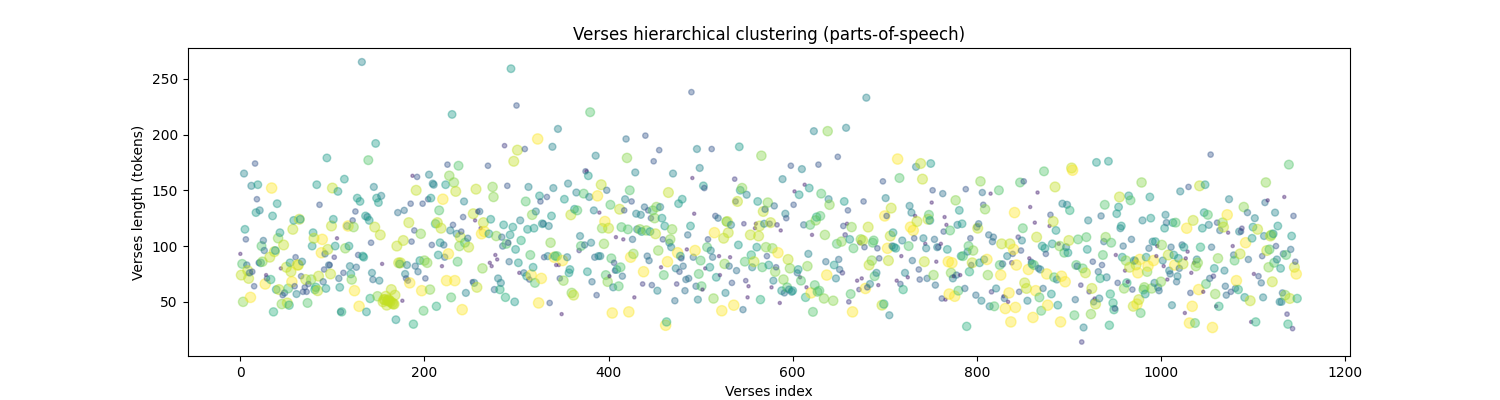

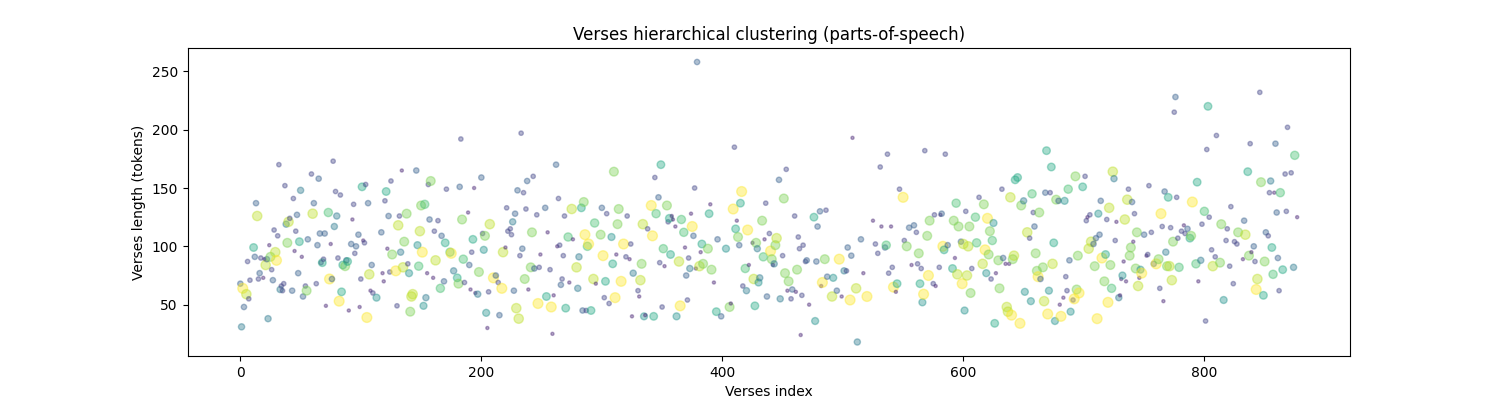

In [28]:
def lengths_positions(df):    
    colors = df.pos_clusters
    
    plt.figure(figsize=(15, 4))
    out = plt.scatter(df.index,verses_length,df.pos_clusters*5, c=colors, alpha=0.4)
    plt.title("Verses hierarchical clustering (parts-of-speech)")
    plt.xlabel("Verses index")
    plt.ylabel("Verses length (tokens)")
    # plt.legend()
    # plt.ylim([20, 400])
    plt.show()

lengths_positions(Evangiles)
lengths_positions(Matt)
lengths_positions(Mark)
lengths_positions(Luke)
lengths_positions(John)


## Clusters representatives
Define as the minimum-length or the median-length observation of the cluster

In [71]:
def representatives(df,feature='pos'):
    n_clusters = len(np.unique(df.pos_clusters))
    for i in range(n_clusters):
        print("\n ------ Representative of cluster :",str(i))
        idx = np.where(df.pos_clusters==i)
        # print(idx[0])
        df_ex = df.iloc[idx[0]].reset_index(drop=True)
        median = np.argsort(df_ex.length)[len(df_ex.length)//2]
        mini = np.argmin(df_ex.length)
        # print(mini)
        print("Number of observations :",len(idx[0]))
        print(df_ex[feature][median])
        
representatives(Mark,'pos')


 ------ Representative of cluster : 0
Number of observations : 41
['pronoun', 'adverb', 'adverb', 'verb', 'verb', 'adposition', 'pronoun', 'coordinating_conjunction', 'pronoun', 'verb', 'verb']

 ------ Representative of cluster : 1
Number of observations : 114
['coordinating_conjunction', 'verb', 'determiner', 'noun', 'pronoun', 'adposition', 'noun', 'coordinating_conjunction', 'verb', 'pronoun', 'adjective', 'verb', 'coordinating_conjunction', 'determiner', 'noun', 'verb', 'pronoun', 'determiner', 'noun', 'pronoun']

 ------ Representative of cluster : 2
Number of observations : 234
['coordinating_conjunction', 'verb', 'adposition', 'determiner', 'noun', 'pronoun', 'verb', 'determiner', 'noun', 'verb', 'adposition', 'determiner', 'noun', 'coordinating_conjunction', 'determiner', 'noun', 'verb']

 ------ Representative of cluster : 3
Number of observations : 40
['adverb', 'adverb', 'verb', 'pronoun', 'verb', 'noun', 'noun', 'noun']

 ------ Representative of cluster : 4
Number of obs

# Clusters statistics